Engy-5310: Computational Continuum Transport Phenomena Fall 2021 UMass Lowell; Prof. V. F. de Almeida **18Sep21**

# Homework 02 (21Sep21)

$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

### Name: `your name`

### Rubric for each assignment: 

|       Context               |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file in the Blackboard submission portal as: 
   </span> 
   
   **lastname-firstname-labwork-xx.ipynb**

---
## Table of Assignments<a id="toa"></a>
* [Assignment 1 (45 pts)](#a1) Function approximation with Wavelets basis functions at collocation points.
 - [1.1)](#a11)(5 pts) Generate the target function.
 - [1.2)](#a12)(20 pts) Compute parameters for a given error level.
 - [1.3)](#a13)(10 pts) Plot the residual function and analyze it.
 - [1.4)](#a14)(10 pts) Demonstrate *numerically* the residual is a minimum.
* [Assignment 2 (40 pts)](#a2) Function approximation with Wavelets basis functions.
 - [2.1)](#a21)(30 pts) Using the same basis functions, approximate the target function continuously ($m\rightarrow\infty$).
 - [2.2)](#a22)(10 pts) Demonstrate *numerically* the residual is a minimum.
* [Assignment 3 (5 pts)](#a3) .
---

## <span style="color:blue">[Assignment 1 (45 pts)](#toa)</span><a id="a1"></a>

### <span style="color:blue">[1.1)](#toa)(5 pts) Generate the following piecewise linear function on these shape points:</span>
<br>
<span style="color:blue">
  $\{(-8,1),(-6,10),(-5,-7),(0,-5),(1,9),(2,-8),(3,28),(5,-23),(7,12),(9,1),(10,10),(12,15),(14,18),(15,10)\}$.
</span><a id="a11"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from numpy.linalg import solve
from scipy.integrate import quad
import math

In [2]:
shape_pts=np.array([(-8,1),(-6,10),(-5,-7),(0,-5),(1,9),(2,-8),(3,28),(5,-23),(7,12),(9,1),(10,10),(12,15),(14,18),(15,10)])

x = shape_pts[:,0]
y = shape_pts[:,1]

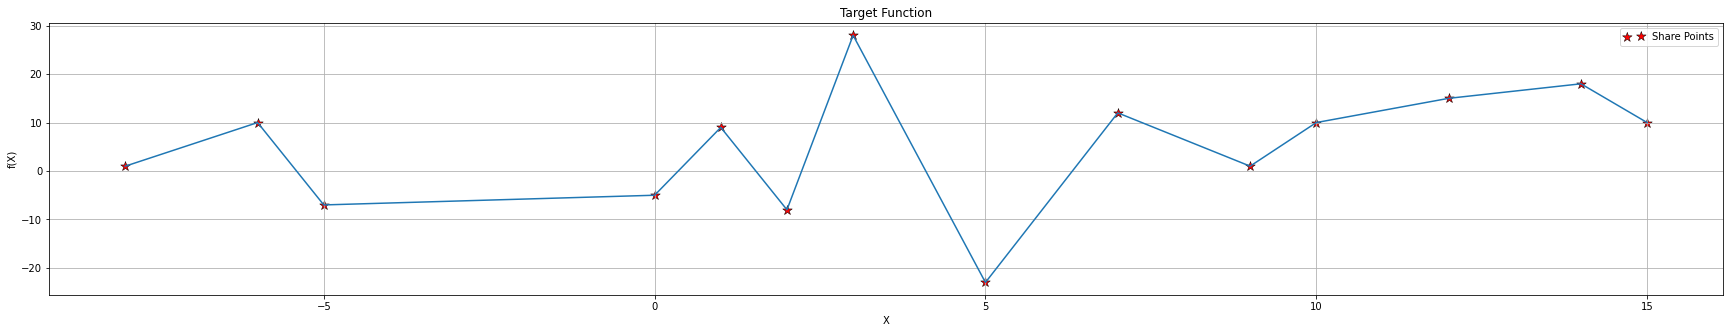

In [3]:
'''Generate the target function f'''

%matplotlib inline
def TargetFunction(x,y,markersize):
    f = plt.figure()
    f.set_figwidth(30)
    f.set_figheight(5)
    plt.plot(x,y)
    p1=plt.scatter(x,y,marker = '*',s=markersize,edgecolors = 'black', linewidth=.5,c = 'red')
    plt.legend([p1],['Share Points'],scatterpoints=2,loc ="upper right")
    plt.xlabel('X')
    plt.ylabel('f(X)')
    plt.title('Target Function')
    plt.rcParams.update({'font.size': 18})
    plt.grid()
    return plt


f = TargetFunction(x,y,markersize = 100)



### <span style="color:blue">[1.2)](#toa)(20 pts) Compute "the best" approximant function $g$ using Wavelet basis functions with adequate parameters to approximate $f$ with a relative $L_2$ norm below 30% error; use a small number of collocation points as you are able to. Report the number of packets, modes, and other parameters used, show a comparison plot, compute the $L_2$ norm relative error, and explain mathematically in what sense is your approximant the best.
</span><a id="a12"></a>

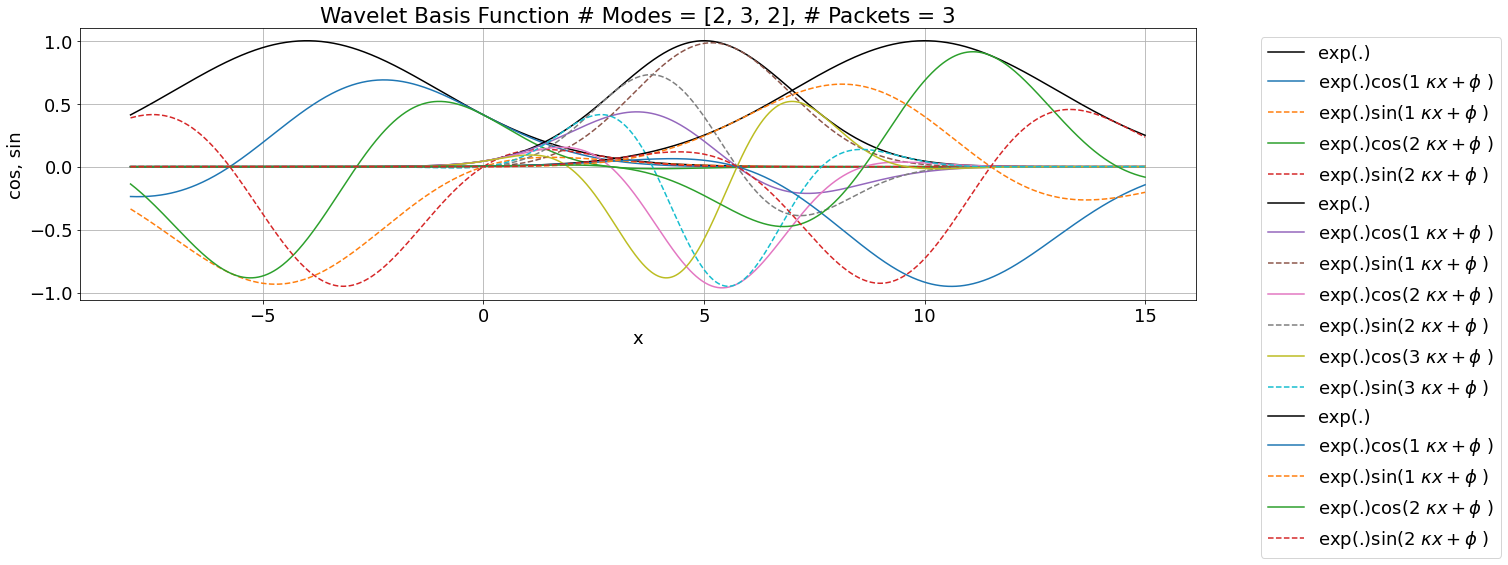

In [110]:
'''Build the basis functions'''
#-------------------------------------------------------------------------------#
#-----------------------------------------------------------------------------------------------------------------------------------------------#
m = 1000
x_min = shape_pts[:,0][0]
x_max = shape_pts[:,0][-1]


x_new = np.linspace(x_min,x_max,m)

def WaveletBasis(x_new, kappa, bunch_pts, N, sigma, phase_shift, points_n):
    A = np.zeros((points_n,int(sum(N)* 2 + len(N))))

    j=0
    for i, modes in enumerate(N):
        sig = sigma[i]
        p = bunch_pts[i]
        first_col = int(sum(N[:i]))*2+i
        A[:,first_col] = np.exp(-((x_new-p)**2)/(2*(sig**2)))
        #print(np.exp(-((x_new-p)**2)/(2*(sig**2))))
        for mode_num in range(modes):
            column = first_col + (mode_num*2) + 1
            j = mode_num + 1
            #points = (())
            A[:,column] = np.exp(-((x_new-p)**2)/(2*(sig**2)))*(np.cos(j*kappa*x_new + (phase_shift*x_new**2)/2))
            A[:,column+1] = np.exp(-((x_new-p)**2)/(2*(sig**2)))*((np.sin(j*kappa*x_new + (phase_shift*x_new**2)/2)))
    return np.array(A)

#for x in range(len(x_new)):

#-------------------------------------------------------------------------------------------------------------------------------------------------#
m = 1000
N = [2, 3, 2]
bunch_pts = [-4, 5, 10]
sigma = [3, 2, 3]
phase_shift = 0

x_min = shape_pts[:,0][0]
x_max = shape_pts[:,0][-1]
wavelength = x_max - x_min
x_new = np.linspace(x_min,x_max,m)

Kappa = (2*np.pi)/wavelength

#-------------------------------------------------------------------------------------------#
A = WaveletBasis(x_new, Kappa, bunch_pts, N, sigma, phase_shift,m)

#-------------------------------------------------------------------------------------------#


def plotWavelet(N,bunch_pts,phase_shift,sigma,kappa,x_min,x_max,x,y,m):

    #num_plotting_pts = 1000
    x_new = np.linspace(x_min, x_max, m)
    A = WaveletBasis(x_new, kappa, bunch_pts, N, sigma, phase_shift,m)

    fig = plt.figure(figsize=(20, 5))
    ax = plt.subplot(111)

    plt.grid()
    plt.title(f"Wavelet Basis Function # Modes = {N}, # Packets = {len(N)}")
    plt.xlabel('x'); plt.ylabel('cos, sin')
    for i, modes in enumerate(N):
        first_col = int(sum(N[:i])) * 2 + i
        plt.plot(x_new, A[:, first_col], "k-", label="exp(.)")
        for modeNum in range(modes):
            # Iterates through an individual packet
            column = first_col + (modeNum) * 2 + 1

            k = modeNum + 1

            plt.plot(x_new, A[:, column],'-' ,label=r"exp(.)cos(%i $\kappa x + \phi$ )" % k)
            plt.plot(x_new, A[:, column + 1],'--' ,label=r"exp(.)sin(%i $\kappa x + \phi$ )" % k)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    return plt.show()
    
    
plotWavelet(N, bunch_pts, phase_shift, sigma, Kappa, x_min, x_max, x, y, m)

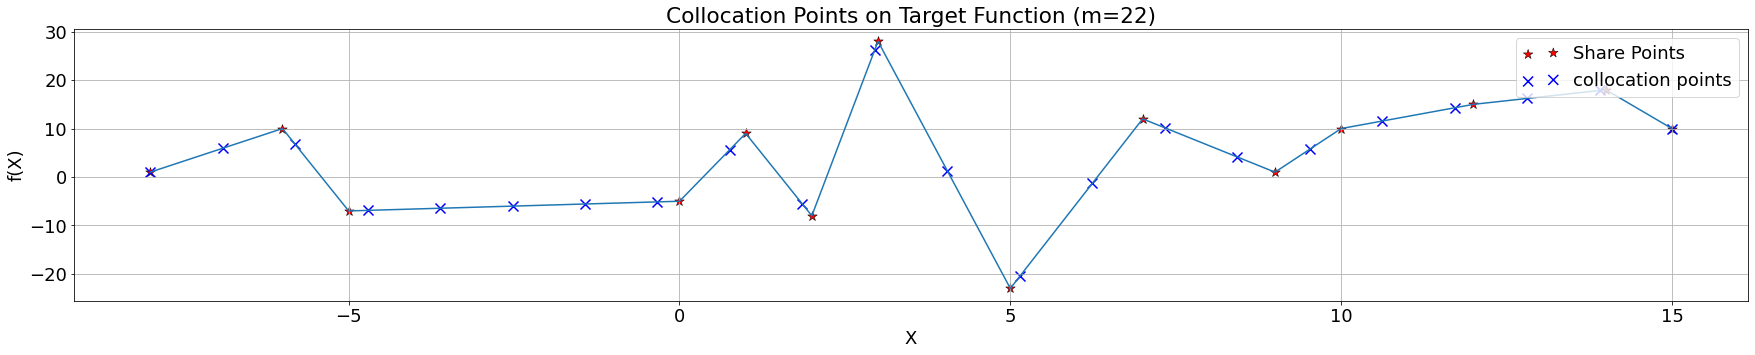

In [103]:
'''Collocation abscissa points'''
x_min = shape_pts[:,0][0]
x_max = shape_pts[:,0][-1]
m = 22
assert m >= len(shape_pts)

u = interpolate.interp1d(x, y, kind='linear',fill_value='array-like')
x_coll = np.linspace(x_min, x_max, m)

y_new = u(x_coll)


markersize = 100


f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.plot(x,y)
p1 = plt.scatter(x, y, marker = '*',s = markersize, edgecolors = 'black', linewidth=.5,c = 'red')
p2 = plt.scatter(x_coll,y_new, marker = 'x',s = markersize,c='blue')
plt.legend([p1,p2],['Share Points','collocation points'],scatterpoints=2,loc ="upper right")
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title(f'Collocation Points on Target Function (m={m})')
plt.rcParams.update({'font.size': 18})
plt.grid()

In [104]:
'''Build the basis functions collocation matrix'''

#-------------------------------------------------------------------------------------------------------------------#
#Function defined:
def evaluation(x_coll):
    a_tilde_mtrx = WaveletBasis(x_coll, Kappa, bunch_pts, N, sigma, phase_shift,m)
    return np.array(a_tilde_mtrx)
#------------------------------------------------------------------------------------------------------------------#

a_tilde_mtrx = evaluation(x_coll)

if a_tilde_mtrx.shape[0] > a_tilde_mtrx.shape[1]:
    print('A is overdetermined.')
elif a_tilde_mtrx.shape[0] < a_tilde_mtrx.shape[1]:
    print('A is underdetermined.')  
else:
    print('A is determined.')



if np.linalg.matrix_rank(a_tilde_mtrx) == min(a_tilde_mtrx.shape):
    print('A is full rank.')
else:
    print('A is rank deficient.')


A is overdetermined.
A is full rank.


In [105]:
'''Build target function vector at the collocation points'''

u = interpolate.interp1d(x, y, kind='linear',fill_value='array-like')
x_coll = np.linspace(x_min, x_max, 22)

y_new = u(x_coll)
f_tilde_vec = np.array(y_new)


In [106]:
'''Compute optimal coefficient vector'''

if np.linalg.matrix_rank(a_tilde_mtrx) == min(a_tilde_mtrx.shape):
    print('A is full rank; solve for least squares.')
    
    c_tilde_star_vec = solve(a_tilde_mtrx.transpose()@a_tilde_mtrx, a_tilde_mtrx.transpose()@f_tilde_vec)
else:
    print('A is rank deficient; solve for shortest least squares')
    c_tilde_star_vec = universal_solve(a_tilde_mtrx.transpose()@a_tilde_mtrx, a_tilde_mtrx.transpose()@f_tilde_vec,
                                       pivot_tol=1e-9)

#TODO collect coefficients
print('')
print('c_tilde_star_vec:\n')
for j,c in enumerate(c_tilde_star_vec):
    if j == 0:
        print('a_%2i = %10.3e'%(j,c))
    elif j%2 == 0:
        k = j/2
        print('b_%2i = %10.3e'%(k,c))
    else:
        k = (j+1)/2
        print('a_%2i = %10.3e'%(k,c))


print('')        
print('||r^*||_2 = %10.3e'%(np.linalg.norm(a_tilde_mtrx@c_tilde_star_vec-f_tilde_vec)))


A is full rank; solve for least squares.

c_tilde_star_vec:

a_ 0 = -8.655e+02
a_ 1 =  1.584e+02
b_ 1 = -1.180e+03
a_ 2 =  3.120e+02
b_ 2 =  1.020e+02
a_ 3 =  3.610e+04
b_ 3 = -2.361e+04
a_ 4 = -4.132e+04
b_ 4 = -9.874e+03
a_ 5 =  1.238e+04
b_ 5 =  2.169e+03
a_ 6 =  9.846e+02
b_ 6 = -5.520e+03
a_ 7 = -5.799e+03
b_ 7 = -4.353e+03
a_ 8 = -5.378e+02
b_ 8 = -1.616e+03

||r^*||_2 =  1.299e+01


In [107]:
'''Build the best approximant function'''

def best_g_vec(x_new,c_tilde_star_vec,points_n):
    wav_mtrx = WaveletBasis(x_new, Kappa, bunch_pts, N, sigma, phase_shift, points_n)
    print(wav_mtrx.shape)
    return wav_mtrx@c_tilde_star_vec



(100, 17)


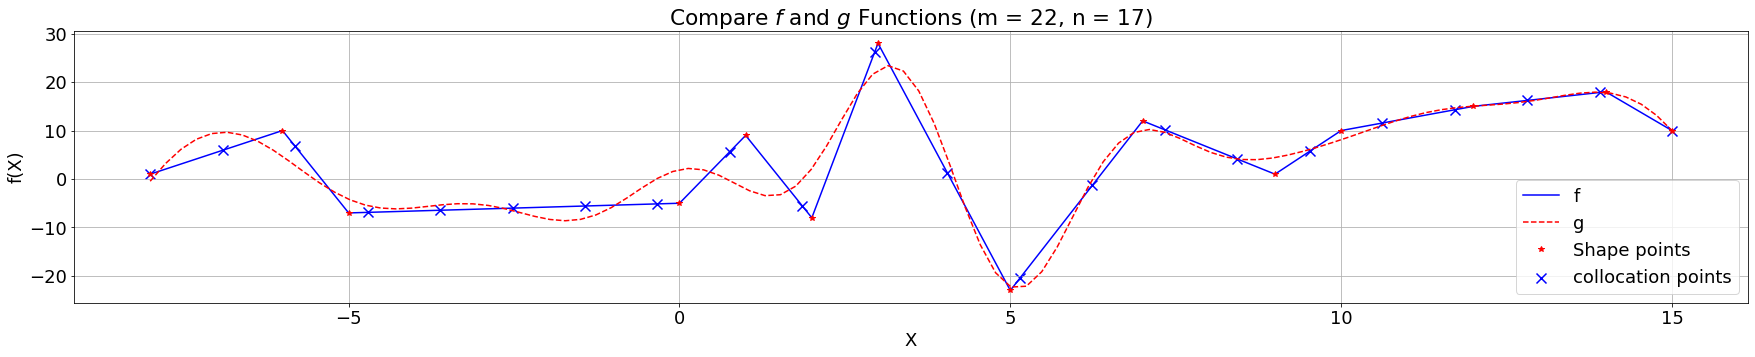

In [108]:
'''Plot comparison of f and g_best_vec'''
m=22
n=17
title=f'Compare $f$ and $g$ Functions (m = {m}, n = {n})'



points_n = max(2*m,100)
x_pts = np.linspace(x_min, x_max, points_n)
#------------------------------------------------------------------------------------------------#

bestg_vec_1 = best_g_vec(x_pts, c_tilde_star_vec,points_n)

def Comparison(x,y,markersize,points_n,title, bestg_vec_1):
    points_n = max(2*m,100)
    x_tilde_pts_new = np.linspace(x_min, x_max, points_n)
    f = plt.figure()
    f.set_figwidth(30)
    f.set_figheight(5)
    p1 = plt.plot(x,y,'b-', label = 'f')
    p2 = plt.plot(x_pts, bestg_vec_1, 'r--', label = 'g')
    p3 = plt.scatter(x_coll,y_new ,s=markersize, marker='x',c='blue', label = 'collocation points')
    plt.plot(shape_pts[:,0], shape_pts[:,1], '*', color='red',label='Shape points')
    plt.legend(loc ="best")
    plt.xlabel('X')
    plt.ylabel('f(X)')
    plt.title(title)
    plt.rcParams.update({'font.size': 18})
    plt.grid()
    return plt

comparison = Comparison(x,y,markersize,points_n,title, bestg_vec_1)

In [109]:
'''L2 norm error'''


def f_integrand(x):
    return u(x)**2
f_integral = quad(f_integrand, x_min, x_max, limit=1000)
f_l2=np.sqrt(f_integral)

print('||f||_L2 =%10.6f'%f_l2[0])
print('quadrature error =%10.6e'%f_l2[1])

def g2_integrand(x):
    g_vec = best_g_vec(np.array([x]),c_tilde_star_vec,points_n)
    return g_vec**2
#f2 = np.vectorize(g2_integrand)

print('')

g2_integral, error = quad(g2_integrand, x_min, x_max, limit=1000)
print('||g||_L2 =', math.sqrt(g2_integral))
print('quadrature error =', error)

def f_minus_g_2_integrand(x):
    f_x = i_p(np.array([x]))
    g_vec = best_g_vec(np.array([x]),c_tilde_star_vec,points_n)
    return (f_x-g_vec)**2

print('')

f_minus_g_2_integral, error = quad(f_minus_g_2_integrand, x_min, x_max, limit=1000)
print('||f-g||_L2 =', math.sqrt(f_minus_g_2_integral))
print('quadrature error =', error)
r_err=(math.sqrt(f_minus_g_2_integral)/np.sqrt(f_integral)*100)
print('')
print('Relative error = %10.6f'%r_err[0],'%')

||f||_L2 = 49.507575
quadrature error =5.392697e-03

(100, 17)


TypeError: only size-1 arrays can be converted to Python scalars

<span style="color:blue">**Explanation:**</span>

### <span style="color:blue">[1.3)](#toa)(10 pts) Plot the residual function and analyze it.
</span><a id="a13"></a>

In [43]:
'''Residual of the best approximant'''
n_pts = max(3*m, 500)
x_pts = np.linspace(x_min, x_max, n_pts)

residual = u(x_pts) - best_g_vec(x_pts,c_tilde_star_vec)
residual_collocation_pts = i_p(new_x) - best_g_vec(new_x,c_tilde_star_vec)
print('Positives at collocation pts = ', tuple([True for p in residual_collocation_pts if p>0]).count(True))
print('Negatives at collocation pts = ', tuple([True for p in residual_collocation_pts if p<0]).count(True))
print('Positives = ', tuple([True for p in residual if p>0]).count(True))
print('Negatives = ', tuple([True for p in residual if p<0]).count(True))
#print(g_best_vec_1) 
plt.figure(1, figsize=(30, 5))
plt.plot(x_pts, residual)
plt.plot(new_x, i_p(new_x)-g_best_vec_func(new_x,c_tilde_star_vec),'bx',label='collocation pts',color='red')
plt.title(r'Residual $r(x) :\!\!= f(x) - g(x)$ ($m\rightarrow\infty$'+str(m)+', n='+str(len(a_tilde_mtrx[0]))+')', fontsize=20)

plt.rcParams.update({'font.size': 18})
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

ValueError: could not broadcast input array from shape (500,) into shape (100,)

<span style="color:blue">**Analysis:**</span>

### <span style="color:blue">[1.4)](#toa)(10 pts) Demonstrate *numerically* that the residual is a minimum. Explain.
</span><a id="a14"></a>

In [ ]:
'''Code for minimum'''


<span style="color:blue">**Explanation:**</span>

## <span style="color:blue">[Assignment 2 (40 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">[2.1)](#toa)(30 pts) Compute "the best" approximant function $g$ using wavelets basis functions with the same parameters as before; use a continuous approximation and compare to the results obtained earlier in 1.2). Does the error decrease? Why or why not?
</span><a id="a21"></a>

In [ ]:
'''Build the Gram matrix'''


In [ ]:
'''Build load vector'''


In [ ]:
'''Compute optimal coefficient vector'''


In [ ]:
'''Build the best approximant function'''


In [ ]:
'''Plot comparison of f and g_best_vec'''


In [ ]:
'''L2 norm error'''


In [ ]:
'''Residual of the best approximant'''


In [ ]:
'''Code for comparison to collocation method'''


<span style="color:blue">**Explanation:**</span>

### <span style="color:blue">[2.2)](#toa)(10 pts) Demonstrate *numerically* that the residual is a minimum. Explain.
</span><a id="a22"></a>

In [ ]:
'''Code for minimum'''


<span style="color:blue">**Explanation:**</span>

## <span style="color:blue">[Assignment 2 (5 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>

<span style="color:blue">**Answer:**</span>